In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from datetime import datetime

## Lectura de datos

In [46]:
path=''

In [3]:
nflx=pd.read_csv(path)

## Exploración general y limpieza de datos

In [4]:
nflx.head()

,Title,Genre,Language,Premiere,Runtime,Seasons
0,Stranger Things,Science fiction/horror,English,"July 15, 2016",42–78 min,"3 seasons, 25 episodes"
1,The Crown,Historical drama,English,"November 4, 2016",47–61 min,"4 seasons, 40 episodes"
2,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes"
3,The Umbrella Academy,Superhero action,English,"February 15, 2019",40–60 min,"2 seasons, 20 episodes"
4,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes"


In [5]:
nflx.dtypes

Title       object
Genre       object
Language    object
Premiere    object
Runtime     object
Seasons     object
dtype: object

In [6]:
nflx.shape

(363, 6)

In [7]:
nflx.isna().sum()

Title        2
Genre       37
Language     0
Premiere     2
Runtime      2
Seasons      2
dtype: int64

In [8]:
nflx.dropna(axis=0,how='all',inplace=True)
nflx.shape

(363, 6)

In [9]:
nflx[nflx['Title'].isna()]

,Title,Genre,Language,Premiere,Runtime,Seasons
343,NaN,NaN,English,NaN,NaN,NaN
344,NaN,NaN,English,NaN,NaN,NaN


In [10]:
nflx[nflx['Genre'].isna()]

,Title,Genre,Language,Premiere,Runtime,Seasons
83,The Dragon Prince,NaN,English,"September 14, 2018",24–33 min,"3 seasons, 27 episodes"
84,Hilda,NaN,English,"September 21, 2018",24–46 min,"2 seasons, 26 episodes"
85,Charlie's Colorforms City,NaN,English,"March 22, 2019",14–25 min,"4 seasons, 23 episodes"
86,Green Eggs and Ham,NaN,English,"November 8, 2019",27–28 min,"1 season, 13 episodes"
87,Go! Go! Cory Carson,NaN,English,"January 4, 2020",7–11 min,"6 seasons, 63 episodes"
88,StarBeam,NaN,English,"April 3, 2020",4–32 min,"4 seasons, 41 episodes"
89,Rhyme Time Town,NaN,English,"June 19, 2020",24 min,"2 seasons, 21 episodes"
90,Jurassic World Camp Cretaceous,NaN,English,"September 18, 2020",24 min,"4 seasons, 37 episodes"
91,Mighty Express,NaN,English,"September 22, 2020",14–25 min,"5 seasons, 34 episodes"
92,Trash Truck,NaN,English,"November 10, 2020",10–17 min,"2 seasons, 28 episodes"


In [11]:
#Eliminamos los que no tienen titulo
nflx=nflx[~nflx['Title'].isna()]
nflx=nflx[nflx['Title']!="Awaiting release"]

In [12]:
nflx.shape

(346, 6)

### Modificaciones:
-    Limpiar corchetes
-    Convertir runtime a numero
-    Convertir seasons a números (Separar en varias columnas o sacar episodios totales)
-    Obtener géneros
-    Obtener fechas en premiere

#### Limpiamos corchetes

In [13]:
x=nflx['Premiere'][0]
y=nflx['Premiere'][117]
print(y)
print(re.findall('.*(?=\[)|.*',y))
print(x)
print(re.findall('.*(?=\[)|.*',x))

September 26, 2022[72]
['September 26, 2022', '', '[72]', '']
July 15, 2016
['July 15, 2016', '']


In [14]:
def eliminar_corch(x):
    if pd.isnull(x):
        return np.nan
    else:
        return re.findall('.*(?=\[)|.*',x)[0]

In [15]:
# nflx['Title']=nflx['Title'].apply(eliminar_corch)
for d in nflx.columns:
    nflx[d]=nflx[d].apply(eliminar_corch)

In [16]:
nflx[nflx['Genre'].isna()]

,Title,Genre,Language,Premiere,Runtime,Seasons
83,The Dragon Prince,NaN,English,"September 14, 2018",24–33 min,"3 seasons, 27 episodes"
84,Hilda,NaN,English,"September 21, 2018",24–46 min,"2 seasons, 26 episodes"
85,Charlie's Colorforms City,NaN,English,"March 22, 2019",14–25 min,"4 seasons, 23 episodes"
86,Green Eggs and Ham,NaN,English,"November 8, 2019",27–28 min,"1 season, 13 episodes"
87,Go! Go! Cory Carson,NaN,English,"January 4, 2020",7–11 min,"6 seasons, 63 episodes"
88,StarBeam,NaN,English,"April 3, 2020",4–32 min,"4 seasons, 41 episodes"
89,Rhyme Time Town,NaN,English,"June 19, 2020",24 min,"2 seasons, 21 episodes"
90,Jurassic World Camp Cretaceous,NaN,English,"September 18, 2020",24 min,"4 seasons, 37 episodes"
91,Mighty Express,NaN,English,"September 22, 2020",14–25 min,"5 seasons, 34 episodes"
92,Trash Truck,NaN,English,"November 10, 2020",10–17 min,"2 seasons, 28 episodes"


#### Obtenemos nuevas columnas con las fechas

In [17]:
x=nflx['Premiere'][0]
print(re.findall('\w*(?=\s)',x)) #mes
print(re.findall('(?<=\s)\d*(?=,)',x)) #dia
print(re.findall('\d*$',x)) #año

['July', '', '']
['15']
['2016', '']


In [18]:
def mes(x):
    if pd.isnull(x):
        return np.nan
    else:
        return re.findall('\w*(?=\s)',x)[0]

def dia(x):
    if pd.isnull(x):
        return np.nan
    else:
        return re.findall('(?<=\s)\d*(?=,)',x)[0]

def anio(x):
    if pd.isnull(x):
        return np.nan
    else:
        return re.findall('\d*$',x)[0]

In [19]:
nflx['mes']=nflx['Premiere'].apply(mes)
nflx['dia']=nflx['Premiere'].apply(dia)
nflx['anio']=nflx['Premiere'].apply(anio)

In [20]:
nflx[nflx['Genre'].isna()]

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio
83,The Dragon Prince,NaN,English,"September 14, 2018",24–33 min,"3 seasons, 27 episodes",September,14,2018
84,Hilda,NaN,English,"September 21, 2018",24–46 min,"2 seasons, 26 episodes",September,21,2018
85,Charlie's Colorforms City,NaN,English,"March 22, 2019",14–25 min,"4 seasons, 23 episodes",March,22,2019
86,Green Eggs and Ham,NaN,English,"November 8, 2019",27–28 min,"1 season, 13 episodes",November,8,2019
87,Go! Go! Cory Carson,NaN,English,"January 4, 2020",7–11 min,"6 seasons, 63 episodes",January,4,2020
88,StarBeam,NaN,English,"April 3, 2020",4–32 min,"4 seasons, 41 episodes",April,3,2020
89,Rhyme Time Town,NaN,English,"June 19, 2020",24 min,"2 seasons, 21 episodes",June,19,2020
90,Jurassic World Camp Cretaceous,NaN,English,"September 18, 2020",24 min,"4 seasons, 37 episodes",September,18,2020
91,Mighty Express,NaN,English,"September 22, 2020",14–25 min,"5 seasons, 34 episodes",September,22,2020
92,Trash Truck,NaN,English,"November 10, 2020",10–17 min,"2 seasons, 28 episodes",November,10,2020


In [21]:
nflx['Fecha']=nflx['Premiere'].apply(lambda x:datetime.strptime(x,"%B %d, %Y"))

In [22]:
nflx['Prim_mes']=('1'+nflx['mes']+nflx['anio']).apply(lambda y: datetime.strptime(y,"%d%B%Y"))

In [23]:
nflx.head(10)

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes
0,Stranger Things,Science fiction/horror,English,"July 15, 2016",42–78 min,"3 seasons, 25 episodes",July,15,2016,2016-07-15,2016-07-01
1,The Crown,Historical drama,English,"November 4, 2016",47–61 min,"4 seasons, 40 episodes",November,4,2016,2016-11-04,2016-11-01
2,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes",July,21,2017,2017-07-21,2017-07-01
3,The Umbrella Academy,Superhero action,English,"February 15, 2019",40–60 min,"2 seasons, 20 episodes",February,15,2019,2019-02-15,2019-02-01
4,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes",April,11,2019,2019-04-11,2019-04-01
5,Raising Dion,Superhero/Science fiction drama,English,"October 4, 2019",37–51 min,"2 seasons, 17 episodes",October,4,2019,2019-10-04,2019-10-01
6,Virgin River,Romantic drama,English,"December 6, 2019",40–49 min,"3 seasons, 30 episodes",December,6,2019,2019-12-06,2019-12-01
7,The Witcher,Fantasy drama,English,"December 20, 2019",47–67 min,"2 seasons, 16 episodes",December,20,2019,2019-12-20,2019-12-01
8,Locke & Key,Fantasy drama/Supernatural horror,English,"February 7, 2020",40–56 min,"2 seasons, 20 episodes",February,7,2020,2020-02-07,2020-02-01
9,Outer Banks,Coming-of-age drama,English,"April 15, 2020",42–61 min,"2 seasons, 20 episodes",April,15,2020,2020-04-15,2020-04-01


#### Convertimos runtime a numero

In [24]:
nflx[nflx['Genre'].isna()]

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes
83,The Dragon Prince,NaN,English,"September 14, 2018",24–33 min,"3 seasons, 27 episodes",September,14,2018,2018-09-14,2018-09-01
84,Hilda,NaN,English,"September 21, 2018",24–46 min,"2 seasons, 26 episodes",September,21,2018,2018-09-21,2018-09-01
85,Charlie's Colorforms City,NaN,English,"March 22, 2019",14–25 min,"4 seasons, 23 episodes",March,22,2019,2019-03-22,2019-03-01
86,Green Eggs and Ham,NaN,English,"November 8, 2019",27–28 min,"1 season, 13 episodes",November,8,2019,2019-11-08,2019-11-01
87,Go! Go! Cory Carson,NaN,English,"January 4, 2020",7–11 min,"6 seasons, 63 episodes",January,4,2020,2020-01-04,2020-01-01
88,StarBeam,NaN,English,"April 3, 2020",4–32 min,"4 seasons, 41 episodes",April,3,2020,2020-04-03,2020-04-01
89,Rhyme Time Town,NaN,English,"June 19, 2020",24 min,"2 seasons, 21 episodes",June,19,2020,2020-06-19,2020-06-01
90,Jurassic World Camp Cretaceous,NaN,English,"September 18, 2020",24 min,"4 seasons, 37 episodes",September,18,2020,2020-09-18,2020-09-01
91,Mighty Express,NaN,English,"September 22, 2020",14–25 min,"5 seasons, 34 episodes",September,22,2020,2020-09-22,2020-09-01
92,Trash Truck,NaN,English,"November 10, 2020",10–17 min,"2 seasons, 28 episodes",November,10,2020,2020-11-10,2020-11-01


In [25]:
x=nflx['Runtime'][77]
y=nflx['Runtime'][78]
print(x)
print(re.findall('\d*|\d*(?=–)',x))
print(y)
print(re.findall('\d*|\d*(?=–)',y))

25–28 min
['25', '', '28', '', '', '', '', '']
24–25 min
['24', '', '25', '', '', '', '', '']


In [26]:
x=nflx['Runtime'][77]
y=nflx['Runtime'][78]
print(x)
print(re.search('–',x))
print(re.findall('\d*',x))
print(re.findall('(?<=–)\d*',x))
print(y)
print(re.search('–',y))
print(re.findall('\d*',y))

25–28 min
<re.Match object; span=(2, 3), match='–'>
['25', '', '28', '', '', '', '', '']
['28']
24–25 min
<re.Match object; span=(2, 3), match='–'>
['24', '', '25', '', '', '', '', '']


In [27]:
def minimo_rt(x):
    if pd.isnull(x) or x=='TBA':
        return np.nan
    else:
        return re.findall('\d*',x)[0]
    
def maximo_rt(x):
    if pd.isnull(x) or x=='TBA':
        return np.nan
    else:
        if re.search('–',x):
            return re.findall('(?<=–)\d*',x)[0]
        else:
            return re.findall('\d*',x)[0]


In [28]:
nflx['min']=nflx['Runtime'].apply(minimo_rt)

In [29]:
nflx['max']=nflx['Runtime'].apply(maximo_rt)

In [30]:
nflx[nflx['Genre'].isna()]

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes,min,max
83,The Dragon Prince,NaN,English,"September 14, 2018",24–33 min,"3 seasons, 27 episodes",September,14,2018,2018-09-14,2018-09-01,24,33
84,Hilda,NaN,English,"September 21, 2018",24–46 min,"2 seasons, 26 episodes",September,21,2018,2018-09-21,2018-09-01,24,46
85,Charlie's Colorforms City,NaN,English,"March 22, 2019",14–25 min,"4 seasons, 23 episodes",March,22,2019,2019-03-22,2019-03-01,14,25
86,Green Eggs and Ham,NaN,English,"November 8, 2019",27–28 min,"1 season, 13 episodes",November,8,2019,2019-11-08,2019-11-01,27,28
87,Go! Go! Cory Carson,NaN,English,"January 4, 2020",7–11 min,"6 seasons, 63 episodes",January,4,2020,2020-01-04,2020-01-01,7,11
88,StarBeam,NaN,English,"April 3, 2020",4–32 min,"4 seasons, 41 episodes",April,3,2020,2020-04-03,2020-04-01,4,32
89,Rhyme Time Town,NaN,English,"June 19, 2020",24 min,"2 seasons, 21 episodes",June,19,2020,2020-06-19,2020-06-01,24,24
90,Jurassic World Camp Cretaceous,NaN,English,"September 18, 2020",24 min,"4 seasons, 37 episodes",September,18,2020,2020-09-18,2020-09-01,24,24
91,Mighty Express,NaN,English,"September 22, 2020",14–25 min,"5 seasons, 34 episodes",September,22,2020,2020-09-22,2020-09-01,14,25
92,Trash Truck,NaN,English,"November 10, 2020",10–17 min,"2 seasons, 28 episodes",November,10,2020,2020-11-10,2020-11-01,10,17


#### Convertimos seasons a números

In [31]:
nflx['Seasons'].unique()

array(['3 seasons, 25 episodes', '4 seasons, 40 episodes',
       '4 seasons, 37 episodes', '2 seasons, 20 episodes',
       '2 seasons, 16 episodes', '2 seasons, 17 episodes',
       '3 seasons, 30 episodes', '2 seasons, 13 episodes',
       '1 season, 10 episodes', '2 seasons, 12 episodes',
       '1 season, 8 episodes', '1 season, 6 episodes',
       '1 season, 5 episodes', 'TBA', '6 episodes',
       '7 seasons, 82 episodes', '3 seasons, 24 episodes',
       '4 parts, 34 episodes', '2 seasons, 18 episodes',
       '2 seasons, 7 episodes', '1 season, 9 episodes',
       '5 seasons, 51 episodes', '4 parts, 40 episodes',
       '2 volumes, 26 episodes', '2 parts, 10 episodes',
       '1 part, 8 episodes', '1 season, 12 episodes',
       '1 part, 10 episodes', '1 season, 7 episodes',
       '1 season, 13 episodes', '2 books, 16 episodes',
       '1 season, 4 episodes', '3 seasons, 27 episodes',
       '2 seasons, 26 episodes', '4 seasons, 23 episodes',
       '6 seasons, 63 episodes', 

In [32]:
x=nflx['Seasons'][62]
y=nflx['Seasons'][130]
print(x)
print(x.split(',')[1].strip().split()[0])
print(y)
print(y.split(','))

1 season, 8 episodes
8
TBA
['TBA']


In [33]:
def temps(x):
    if pd.isnull(x):
        return np.nan
    elif re.search(',',x):
        return x.split(',')[0].split()[0]
    else:
        return np.nan
    
def eps(x):
    if pd.isnull(x):
        return np.nan
    elif re.search(',',x):
        return x.split(',')[1].strip().split()[0]
    else:
        return np.nan

In [34]:
nflx['Temps']=nflx['Seasons'].apply(temps)

In [35]:
nflx['Eps']=nflx['Seasons'].apply(eps)

In [36]:
nflx[nflx['Genre'].isna()]

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes,min,max,Temps,Eps
83,The Dragon Prince,NaN,English,"September 14, 2018",24–33 min,"3 seasons, 27 episodes",September,14,2018,2018-09-14,2018-09-01,24,33,3,27
84,Hilda,NaN,English,"September 21, 2018",24–46 min,"2 seasons, 26 episodes",September,21,2018,2018-09-21,2018-09-01,24,46,2,26
85,Charlie's Colorforms City,NaN,English,"March 22, 2019",14–25 min,"4 seasons, 23 episodes",March,22,2019,2019-03-22,2019-03-01,14,25,4,23
86,Green Eggs and Ham,NaN,English,"November 8, 2019",27–28 min,"1 season, 13 episodes",November,8,2019,2019-11-08,2019-11-01,27,28,1,13
87,Go! Go! Cory Carson,NaN,English,"January 4, 2020",7–11 min,"6 seasons, 63 episodes",January,4,2020,2020-01-04,2020-01-01,7,11,6,63
88,StarBeam,NaN,English,"April 3, 2020",4–32 min,"4 seasons, 41 episodes",April,3,2020,2020-04-03,2020-04-01,4,32,4,41
89,Rhyme Time Town,NaN,English,"June 19, 2020",24 min,"2 seasons, 21 episodes",June,19,2020,2020-06-19,2020-06-01,24,24,2,21
90,Jurassic World Camp Cretaceous,NaN,English,"September 18, 2020",24 min,"4 seasons, 37 episodes",September,18,2020,2020-09-18,2020-09-01,24,24,4,37
91,Mighty Express,NaN,English,"September 22, 2020",14–25 min,"5 seasons, 34 episodes",September,22,2020,2020-09-22,2020-09-01,14,25,5,34
92,Trash Truck,NaN,English,"November 10, 2020",10–17 min,"2 seasons, 28 episodes",November,10,2020,2020-11-10,2020-11-01,10,17,2,28


#### Obtener géneros

In [37]:
print(nflx['Genre'].unique())
print(len(nflx['Genre'].unique()))

['Science fiction/horror' 'Historical drama' 'Crime drama'
 'Superhero action' 'Apocalyptic fiction drama'
 'Superhero/Science fiction drama' 'Romantic drama' 'Fantasy drama'
 'Fantasy drama/Supernatural horror' 'Coming-of-age drama' 'Teen drama'
 'Fantasy' 'Detective drama' 'Psychological thriller' 'Historical romance'
 'Teen drama fantasy' 'Drama' 'Found footage horror' 'Thriller'
 'Historical period drama' 'Science fiction' 'Anthology series'
 'Comedy-drama' 'Comedy' 'Sketch comedy' 'Black comedy-drama' 'Sitcom'
 'Coming-of-age comedy-drama' 'Workplace comedy' 'Dark comedy thriller'
 'Crime comedy/Reality show' "Children's comedy" 'Coming-of-age comedy'
 'Medieval fantasy comedy' 'Anthology' 'Science fantasy'
 'Educational/Comedy' 'Superhero live-action animation mix'
 'Science fiction/Tokusatsu' 'Fantasy/Action' 'Mecha/Kaiju'
 'Dark fantasy/Action' 'Historical fantasy/Action' 'Dark fantasy/Crime'
 'Action' 'CG animation/Horror' 'Martial arts' 'Crime' nan
 'Romantic comedy' 'Fantasy

In [ ]:
# Science fiction <-'Science fiction/horror', 'Superhero/Science fiction drama', 'Fantasy','Science fiction','Science fantasy'
# ,'Science fiction/Tokusatsu', 'Fantasy/Action','Mecha/Kaiju','Dark fantasy/Action','Dark fantasy/Crime','Fantasy horror'
# ,'Coming-of-age science fiction','Science fiction comedy-drama','Fantasy superhero drama','Science-fiction'
#,'Science fiction/Superhero'

# Drama<-'Crime drama','Apocalyptic fiction drama', 'Fantasy drama', 'Coming-of-age drama','Teen drama','Detective drama'
# ,'Teen drama fantasy','Drama','Supernatural drama','Young adult mystery drama','Melodrama', 'Military drama'
# ,'Crime teen drama','Dramedy','Mystery teen drama'

# Action<-'Superhero action', 'Superhero live-action animation mix','Action','Martial arts','Crime','Police procedural'
# ,'Action drama','True crime','Martial arts/Action dramedy'

# Romance<- 'Romantic drama','Romantic comedy','Romantic comedy/Musical'

# Horror<-'Fantasy drama/Supernatural horror','Found footage horror','Horror'

# Historical<-'Historical drama', 'Historical romance','Historical period drama','Anthology series','Anthology'
# ,'Historical fantasy/Action'

# Thriller<-'Psychological thriller','Thriller','Crime thriller','Romantic thriller','Fantasy thriller','Survival thriller'
# ,'Science fiction thriller','Suspense thriller/Melodrama','Teen mystery thriller anthology','Teen mystery thriller'

# Comedy<-'Comedy-drama','Comedy','Sketch comedy', 'Black comedy-drama', 'Sitcom','Coming-of-age comedy-drama'
# , 'Workplace comedy' 'Dark comedy thriller','Crime comedy/Reality show',"Children's comedy", 'Coming-of-age comedy'
# ,'Medieval fantasy comedy','Educational/Comedy','Dark comedy','Workplace dramedy','Period dramedy','Comedy drama'
# ,'Musical comedy','Teen musical comedy-drama','Prank show','Crime comedy/Variety show'

# Animated<-'CG animation/Horror','Anime','Animation','Adult animated horror comedy','Animated science fiction fantasy'

#Documentary<-'Mockumentary','Travel documentary', 'Docuseries','Educational','Nature documentary','Docu-soap','Docu-reality'
#,'Nature docuseries'

#Telenovela<-'Telenovela'

#Sports<-'Sport','Sport/True crime'

#Reality<-'Makeover reality', 'Baking competition', 'Reality','Music competition','Reality competition','Dating show'
#,'Game show', 'Travel reality', 'Reality show','Talk show','Aftershow'


In [38]:
def clasif_generos(x):
    Science_fiction=('Science fiction/horror', 'Superhero/Science fiction drama', 'Fantasy',
                         'Science fiction','Science fantasy','Science fiction/Tokusatsu', 'Fantasy/Action',
                         'Mecha/Kaiju','Dark fantasy/Action','Dark fantasy/Crime','Fantasy horror',
                         'Coming-of-age science fiction','Science fiction comedy-drama','Fantasy superhero drama',
                         'Science-fiction','Science fiction/Superhero')

    Drama=('Crime drama','Apocalyptic fiction drama', 'Fantasy drama', 'Coming-of-age drama'
               ,'Teen drama','Detective drama','Teen drama fantasy','Drama','Supernatural drama'
               ,'Young adult mystery drama','Melodrama', 'Military drama','Crime teen drama','Dramedy'
               ,'Mystery teen drama')

    Action=('Superhero action', 'Superhero live-action animation mix','Action','Martial arts',
            'Crime','Police procedural','Action drama','True crime','Martial arts/Action dramedy')

    Romance=('Romantic drama','Romantic comedy','Romantic comedy/Musical')

    Horror=('Fantasy drama/Supernatural horror','Found footage horror','Horror')

    Historical=('Historical drama', 'Historical romance','Historical period drama','Anthology series',
                'Anthology','Historical fantasy/Action')

    Thriller=('Psychological thriller','Thriller','Crime thriller','Romantic thriller',
              'Fantasy thriller','Survival thriller','Science fiction thriller',
              'Suspense thriller/Melodrama','Teen mystery thriller anthology','Teen mystery thriller')

    Comedy=('Comedy-drama','Comedy','Sketch comedy', 'Black comedy-drama', 'Sitcom',
            'Coming-of-age comedy-drama', 'Workplace comedy', 'Dark comedy thriller',
            'Crime comedy/Reality show',"Children's comedy", 'Coming-of-age comedy',
            'Medieval fantasy comedy','Educational/Comedy','Dark comedy','Workplace dramedy',
            'Period dramedy','Comedy drama','Musical comedy','Teen musical comedy-drama',
            'Prank show','Crime comedy/Variety show')

    Animated=('CG animation/Horror','Anime','Animation','Adult animated horror comedy',
              'Animated science fiction fantasy')

    Documentary=('Mockumentary','Travel documentary', 'Docuseries','Educational',
                 'Nature documentary','Docu-soap','Docu-reality','Nature docuseries')

    Telenovela=('Telenovela','telenovela')

    Sports=('Sport','Sport/True crime')

    Reality=('Makeover reality', 'Baking competition', 'Reality','Music competition',
             'Reality competition','Dating show','Game show', 'Travel reality', 
             'Reality show','Talk show','Aftershow')
    #Science_fiction,Drama, Action,Romance, Horror, Historical,Thriller,Comedy,Animated,Documentary,Telenovela,
  #Sports,Reality
    if x in Science_fiction:
        return "Science fiction"
    elif x in Drama:
        return "Drama"
    elif x in Action:
        return "Action"
    elif x in Romance:
        return "Romance"
    elif x in Horror:
        return "Horror"
    elif x in Historical:
        return "Historical"
    elif x in Thriller:
        return "Thriller"
    elif x in Comedy:
        return "Comedy"
    elif x in Animated:
        return "Animated"
    elif x in Documentary:
        return "Documentary"
    elif x in Telenovela:
        return "Telenovela"
    elif x in Sports:
        return "Sports"
    elif x in Reality:
        return "Reality"
    else:
        return np.nan

In [39]:
nflx['Genero']=nflx['Genre'].apply(clasif_generos)

In [40]:
nflx.iloc[100:120]

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes,min,max,Temps,Eps,Genero
104,"Ada Twist, Scientist",NaN,English,"September 28, 2021",25–29 min,"2 seasons, 12 episodes",September,28,2021,2021-09-28,2021-09-01,25,29,2,12,NaN
105,A Tale Dark & Grimm,NaN,English,"October 8, 2021",27–30 min,"1 season, 10 episodes",October,8,2021,2021-10-08,2021-10-01,27,30,1,10,NaN
106,Karma's World,NaN,English,"October 15, 2021",13 min,"1 season, 15 episodes",October,15,2021,2021-10-15,2021-10-01,13,13,1,15,NaN
107,"StoryBots: Laugh, Learn, Sing",NaN,English,"November 16, 2021",59 min,"1 collection, 1 episode",November,16,2021,2021-11-16,2021-11-01,59,59,1,1,NaN
108,Dogs in Space,NaN,English,"November 18, 2021",20–23 min,"1 season, 10 episodes",November,18,2021,2021-11-18,2021-11-01,20,23,1,10,NaN
109,Word Party Presents: Math!,NaN,English,"December 28, 2021",26 min,"1 season, 10 episodes",December,28,2021,2021-12-28,2021-12-01,26,26,1,10,NaN
110,Action Pack,NaN,English,"January 4, 2022",27–29 min,"1 season, 10 episodes",January,4,2022,2022-01-04,2022-01-01,27,29,1,10,NaN
111,Angry Birds: Summer Madness,NaN,English,"January 28, 2022",11 min,"1 season, 16 episodes",January,28,2022,2022-01-28,2022-01-01,11,11,1,16,NaN
112,The Cuphead Show!,NaN,English,"February 18, 2022",14–17 min,"1 season, 12 episodes",February,18,2022,2022-02-18,2022-02-01,14,17,1,12,NaN
114,Team Zenko Go,NaN,English,"March 15, 2022",TBA,"1 season, 12 episodes",March,15,2022,2022-03-15,2022-03-01,NaN,NaN,1,12,NaN


#### Revisamos tipo de variables

In [41]:
nflx.dtypes

Title               object
Genre               object
Language            object
Premiere            object
Runtime             object
Seasons             object
mes                 object
dia                 object
anio                object
Fecha       datetime64[ns]
Prim_mes    datetime64[ns]
min                 object
max                 object
Temps               object
Eps                 object
Genero              object
dtype: object

In [42]:
nflx=nflx.astype({'dia':'int32','anio':'int32','min':'float64','max':'float64','Temps':'float64','Eps':'float64'})

In [43]:
nflx.dtypes

Title               object
Genre               object
Language            object
Premiere            object
Runtime             object
Seasons             object
mes                 object
dia                  int32
anio                 int32
Fecha       datetime64[ns]
Prim_mes    datetime64[ns]
min                float64
max                float64
Temps              float64
Eps                float64
Genero              object
dtype: object

In [45]:
nflx.to_csv(path+"/nflx_modif.csv",index=False,header=True)

In [45]:
path=''

In [3]:
nflx=pd.read_csv(path+"/nflx_modif.csv")

In [4]:
nflx.dtypes

Title        object
Genre        object
Language     object
Premiere     object
Runtime      object
Seasons      object
mes          object
dia           int64
anio          int64
Fecha        object
Prim_mes     object
min         float64
max         float64
Temps       float64
Eps         float64
Genero       object
dtype: object

#### Si volvemos a importar los datos, hay que volver a modificar el tipo de dato de las fechas.

##### Formatos de fecha:
-    %d: día numérico (0-31)
-    %a: día de la semana a 3 letras
-    %A: día de la semana completo
-    %m: mes numérico (01-12)
-    %b: mes en 3 letras
-    %B: mes completo
-    %y: año a dos dígitos
-    %Y: año a cuatro dígitos

In [5]:
nflx["Fecha"]=nflx['Fecha'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d"))

In [6]:
nflx["Prim_mes"]=nflx["Prim_mes"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

#### Separamos en 2 DF's
##### Uno para series ya publicadas y otro para las por publicar

In [7]:
Actuals=nflx[nflx['Runtime']!='TBA'].reset_index(drop=True)
TBA=nflx[nflx['Runtime']=='TBA'].reset_index(drop=True)

In [8]:
print("Actuals")
print(Actuals.shape)
print("TBA")
print(TBA.shape)

Actuals
(317, 16)
TBA
(29, 16)


#### Análisis gráfico Actuals

In [9]:
Actuals.head(15)

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes,min,max,Temps,Eps,Genero
0,Stranger Things,Science fiction/horror,English,"July 15, 2016",42–78 min,"3 seasons, 25 episodes",July,15,2016,2016-07-15,2016-07-01,42.0,78.0,3.0,25.0,Science fiction
1,The Crown,Historical drama,English,"November 4, 2016",47–61 min,"4 seasons, 40 episodes",November,4,2016,2016-11-04,2016-11-01,47.0,61.0,4.0,40.0,Historical
2,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes",July,21,2017,2017-07-21,2017-07-01,50.0,80.0,4.0,37.0,Drama
3,The Umbrella Academy,Superhero action,English,"February 15, 2019",40–60 min,"2 seasons, 20 episodes",February,15,2019,2019-02-15,2019-02-01,40.0,60.0,2.0,20.0,Action
4,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes",April,11,2019,2019-04-11,2019-04-01,21.0,58.0,2.0,16.0,Drama
5,Raising Dion,Superhero/Science fiction drama,English,"October 4, 2019",37–51 min,"2 seasons, 17 episodes",October,4,2019,2019-10-04,2019-10-01,37.0,51.0,2.0,17.0,Science fiction
6,Virgin River,Romantic drama,English,"December 6, 2019",40–49 min,"3 seasons, 30 episodes",December,6,2019,2019-12-06,2019-12-01,40.0,49.0,3.0,30.0,Romance
7,The Witcher,Fantasy drama,English,"December 20, 2019",47–67 min,"2 seasons, 16 episodes",December,20,2019,2019-12-20,2019-12-01,47.0,67.0,2.0,16.0,Drama
8,Locke & Key,Fantasy drama/Supernatural horror,English,"February 7, 2020",40–56 min,"2 seasons, 20 episodes",February,7,2020,2020-02-07,2020-02-01,40.0,56.0,2.0,20.0,Horror
9,Outer Banks,Coming-of-age drama,English,"April 15, 2020",42–61 min,"2 seasons, 20 episodes",April,15,2020,2020-04-15,2020-04-01,42.0,61.0,2.0,20.0,Drama


#### Gráfico de columnas por género

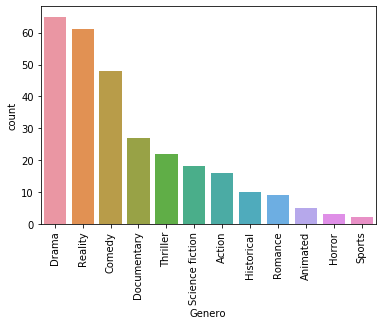

In [10]:
sns.countplot(x="Genero",data=Actuals,order=Actuals['Genero'].value_counts().index)
plt.xticks(rotation="vertical")
plt.show()

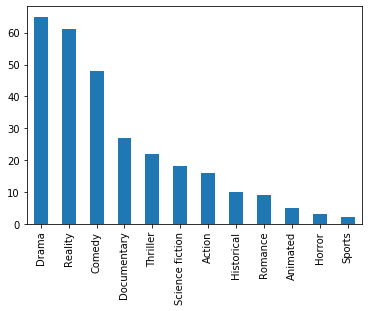

In [11]:
Actuals['Genero'].value_counts().plot.bar()
plt.show()

Podemos observar que, según la clasificación escogida, los géneros más comúnes son drama, reality y comedy.

#### Gráfico de columnas por idioma

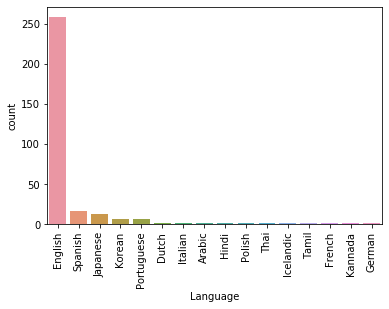

In [12]:
sns.countplot(x="Language",data=Actuals,order=Actuals['Language'].value_counts().index)
plt.xticks(rotation="vertical")
plt.show()

Observamos que la gran mayoría de series están en inglés.

#### Gráficos por género e idioma

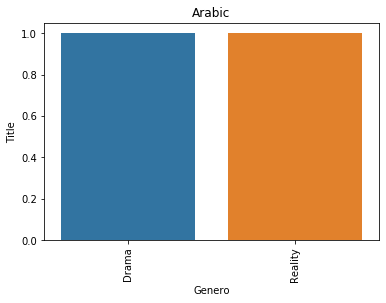

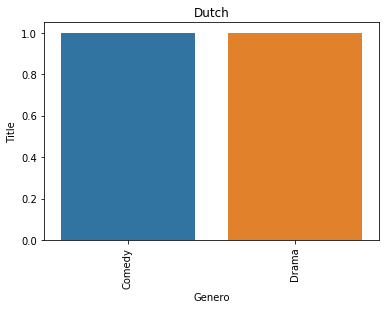

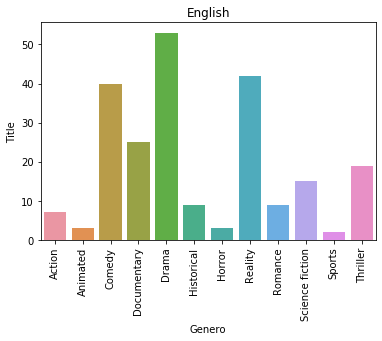

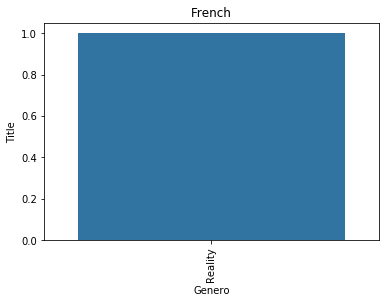

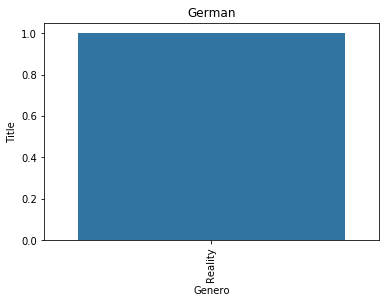

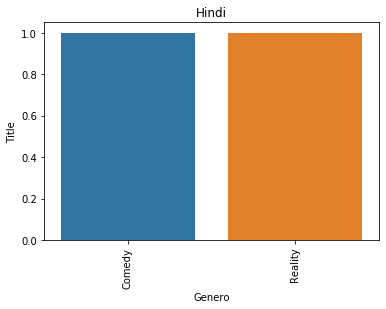

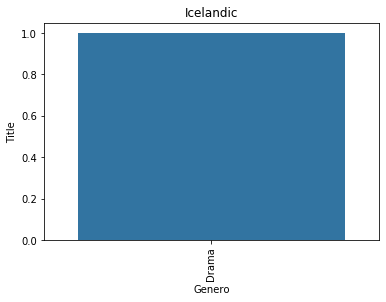

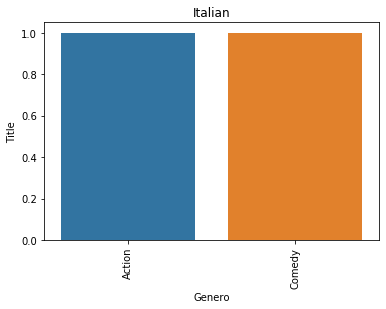

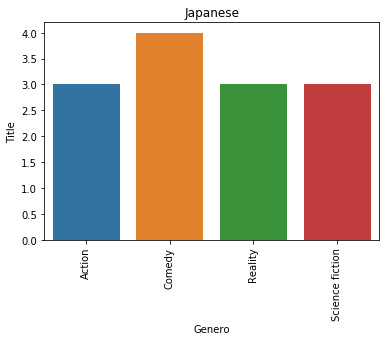

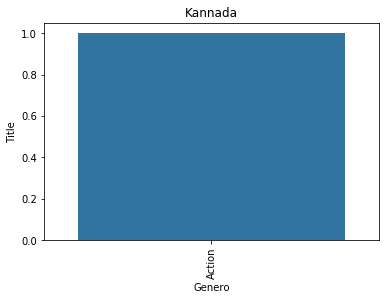

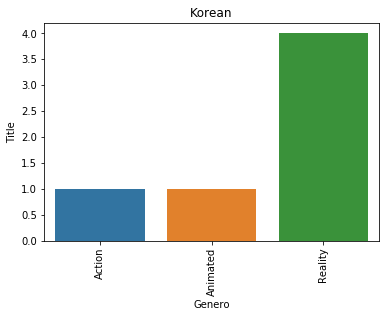

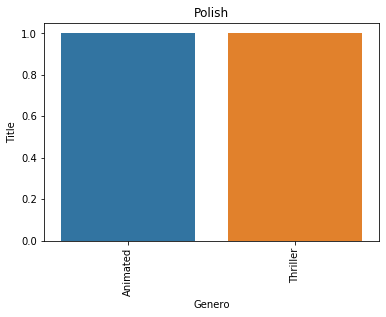

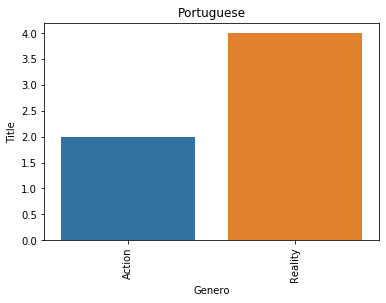

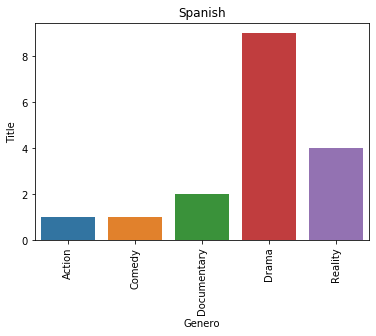

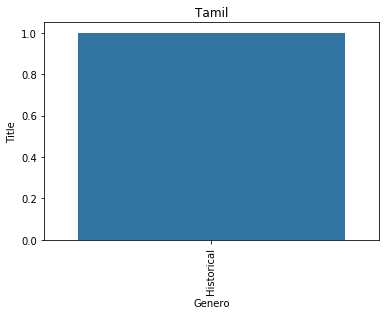

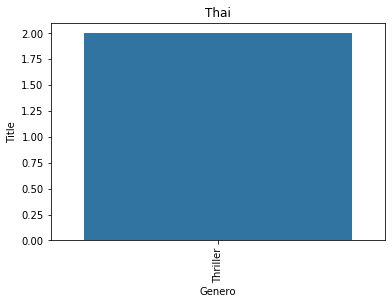

In [13]:
GenLan=Actuals.groupby(["Language","Genero"]).count()['Title'].reset_index()
idiomas=GenLan['Language'].unique()
for idioma in idiomas:
    df=GenLan[GenLan['Language']==idioma]
    sns.barplot(x="Genero",y='Title',data=df)
    plt.title(idioma)
    plt.xticks(rotation="vertical")
    plt.show()

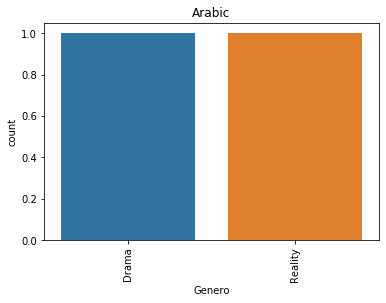

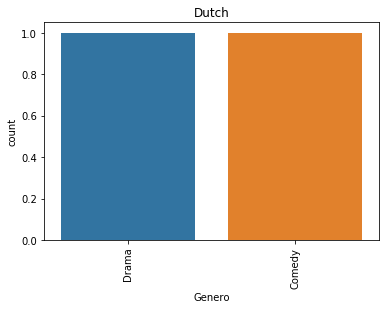

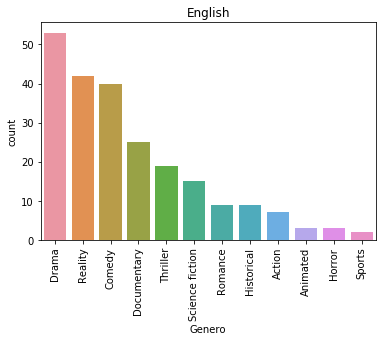

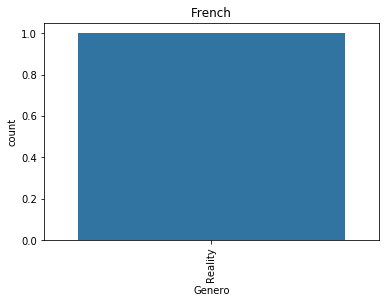

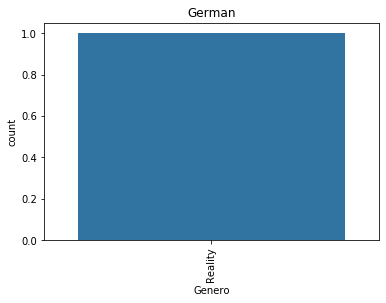

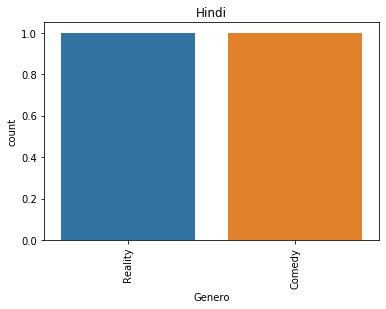

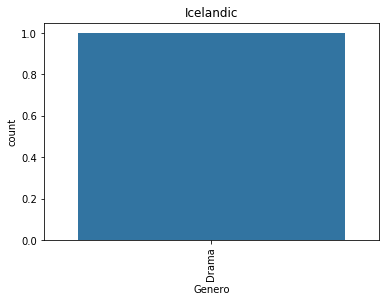

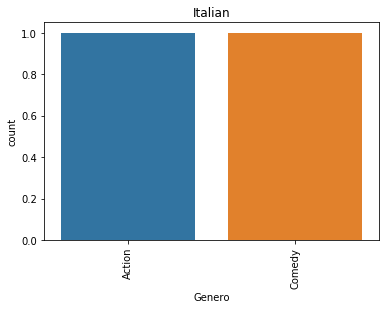

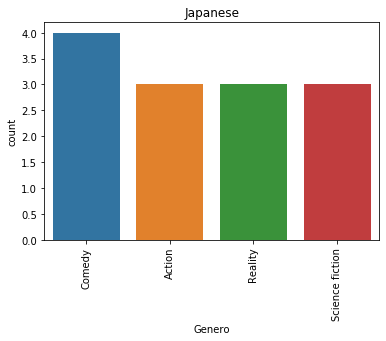

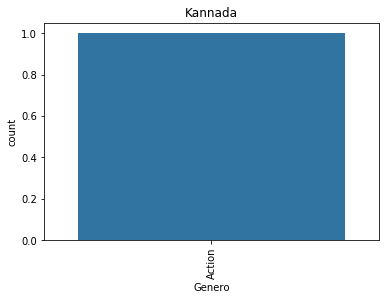

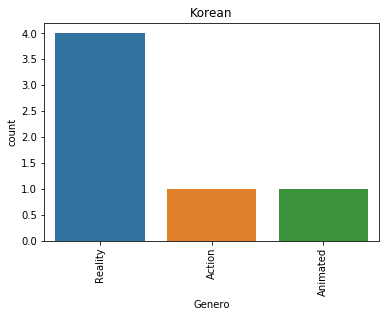

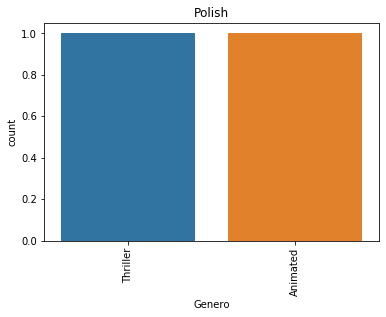

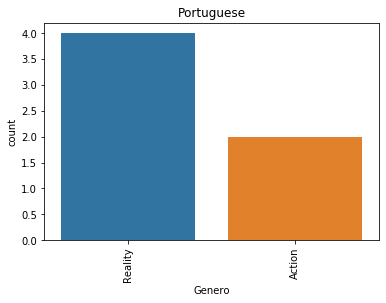

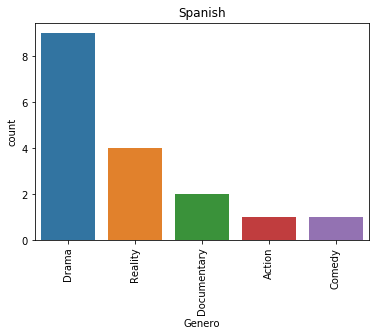

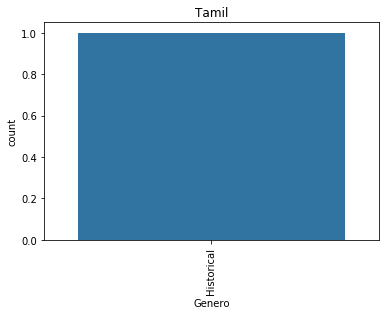

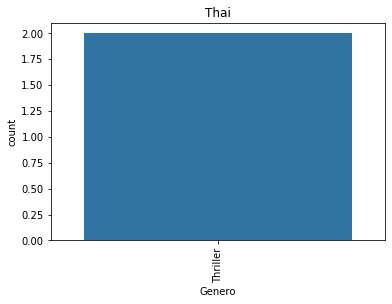

In [14]:
for idioma in idiomas:
    df=Actuals[Actuals['Language']==idioma]
    sns.countplot(x="Genero",data=df,order=df["Genero"].value_counts().index)
    plt.title(idioma)
    plt.xticks(rotation="vertical")
    plt.show()

Al graficar, vemos que el género más común en inglés y español es el drama y en japonés es comedy.

#### Agregamos columnas extra (Num. de episodios total y duración media)

In [15]:
Actuals["Teps"]=Actuals["Temps"]*Actuals["Eps"]
Actuals["Avgtime"]=(Actuals["min"]+Actuals["max"])/2
Actuals.head()

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes,min,max,Temps,Eps,Genero,Teps,Avgtime
0,Stranger Things,Science fiction/horror,English,"July 15, 2016",42–78 min,"3 seasons, 25 episodes",July,15,2016,2016-07-15,2016-07-01,42.0,78.0,3.0,25.0,Science fiction,75.0,60.0
1,The Crown,Historical drama,English,"November 4, 2016",47–61 min,"4 seasons, 40 episodes",November,4,2016,2016-11-04,2016-11-01,47.0,61.0,4.0,40.0,Historical,160.0,54.0
2,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes",July,21,2017,2017-07-21,2017-07-01,50.0,80.0,4.0,37.0,Drama,148.0,65.0
3,The Umbrella Academy,Superhero action,English,"February 15, 2019",40–60 min,"2 seasons, 20 episodes",February,15,2019,2019-02-15,2019-02-01,40.0,60.0,2.0,20.0,Action,40.0,50.0
4,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes",April,11,2019,2019-04-11,2019-04-01,21.0,58.0,2.0,16.0,Drama,32.0,39.5


### Revisamos cómo se distribuyen las nuevas columnas

#### Distribución de episodios totales

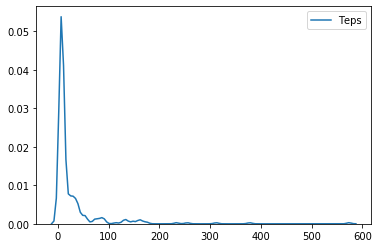

In [16]:
sns.kdeplot(Actuals["Teps"])
plt.show()

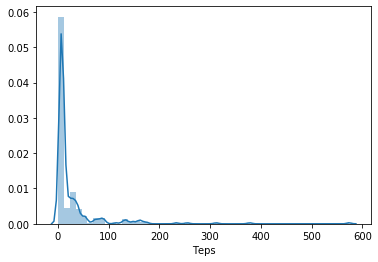

In [17]:
sns.distplot(Actuals["Teps"],kde=True)
plt.show()

Podemos ver que la gran mayoría de series tienen un total de menos de 50 episodios, pero hay algunas que sobrepasan los 200, incluso los 500 eps.

In [18]:
Actuals["Teps"].value_counts().reset_index().sort_values("index",ascending=False).head(10)

,index,Teps
32,574.0,1
34,378.0,1
43,312.0,1
30,255.0,1
42,234.0,1
37,176.0,1
55,170.0,1
57,164.0,1
19,160.0,3
27,148.0,2


In [19]:
Actuals[Actuals["Teps"]>200]

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes,min,max,Temps,Eps,Genero,Teps,Avgtime
28,Grace and Frankie,Comedy-drama,English,"May 8, 2015",25–35 min,"7 seasons, 82 episodes",May,8,2015,2015-05-08,2015-05-01,25.0,35.0,7.0,82.0,Comedy,574.0,30.0
47,Big Mouth,Coming-of-age comedy,English,"September 29, 2017",25–46 min,"5 seasons, 51 episodes",September,29,2017,2017-09-29,2017-09-01,25.0,46.0,5.0,51.0,Comedy,255.0,35.5
76,Go! Go! Cory Carson,NaN,English,"January 4, 2020",7–11 min,"6 seasons, 63 episodes",January,4,2020,2020-01-04,2020-01-01,7.0,11.0,6.0,63.0,NaN,378.0,9.0
222,Queer Eye,Makeover reality,English,"February 7, 2018",43–52 min,"6 seasons, 52 episodes",February,7,2018,2018-02-07,2018-02-01,43.0,52.0,6.0,52.0,Reality,312.0,47.5
223,Nailed It!,Baking competition,English,"March 9, 2018",12–35 min,"6 seasons, 39 episodes",March,9,2018,2018-03-09,2018-03-01,12.0,35.0,6.0,39.0,Reality,234.0,23.5


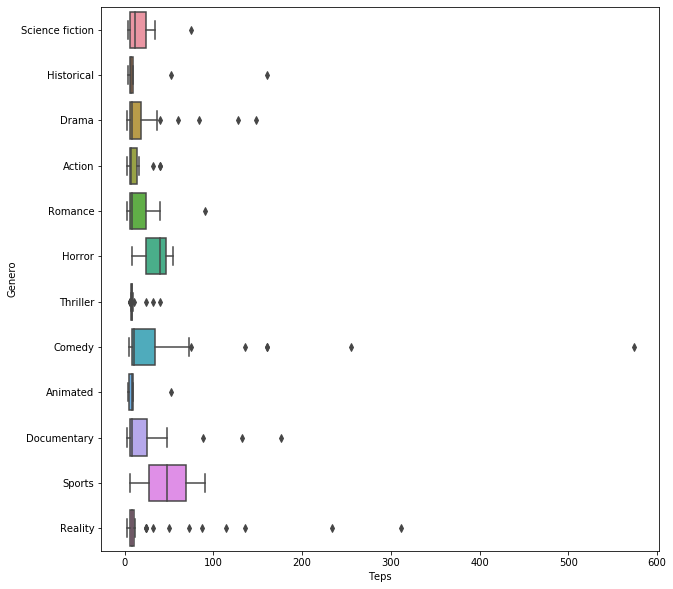

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Teps",y="Genero",data=Actuals)
plt.show()

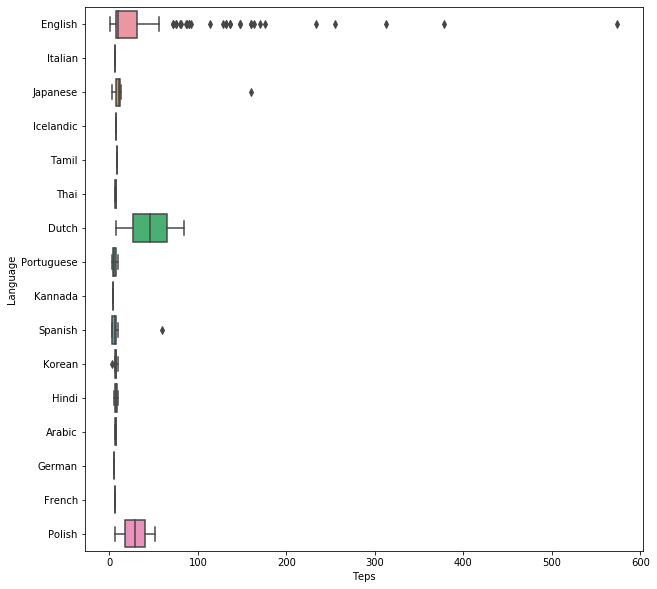

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Teps",y="Language",data=Actuals)
plt.show()

Con los boxplot podemos ver que los géneros horror y sports son los que menos outliers presentan, mientras que comedy y reality son los que más.

#### Distribución de duración media.

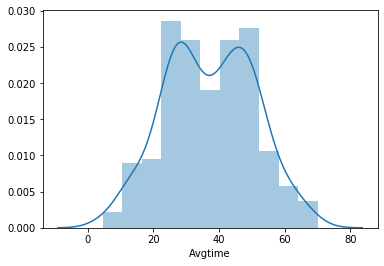

In [22]:
sns.distplot(Actuals["Avgtime"],kde=True)
plt.show()

Podemos observar que la distribución de la duración media por episodio es bimodal. Con las modas en aproximadamente 25 y 50 min.

In [23]:
Actuals.sort_values("Avgtime",ascending=False).head()

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes,min,max,Temps,Eps,Genero,Teps,Avgtime
214,Bad Sport,Sport/True crime,English,"October 6, 2021",55–85 min,"1 volume, 6 episodes",October,6,2021,2021-10-06,2021-10-01,55.0,85.0,1.0,6.0,Sports,6.0,70.0
265,New World,Reality show,Korean,"November 20, 2021",60–77 min,"1 season, 8 episodes",November,20,2021,2021-11-20,2021-11-01,60.0,77.0,1.0,8.0,Reality,8.0,68.5
271,The Hungry and the Hairy,Travel reality,Korean,"December 11, 2021",55–77 min,"1 season, 10 episodes",December,11,2021,2021-12-11,2021-12-01,55.0,77.0,1.0,10.0,Reality,10.0,66.0
2,Ozark,Crime drama,English,"July 21, 2017",50–80 min,"4 seasons, 37 episodes",July,21,2017,2017-07-21,2017-07-01,50.0,80.0,4.0,37.0,Drama,148.0,65.0
300,El Marginal (season 4),Crime drama,Spanish,"January 19, 2022",48–82 min,"1 season, 8 episodes",January,19,2022,2022-01-19,2022-01-01,48.0,82.0,1.0,8.0,Drama,8.0,65.0


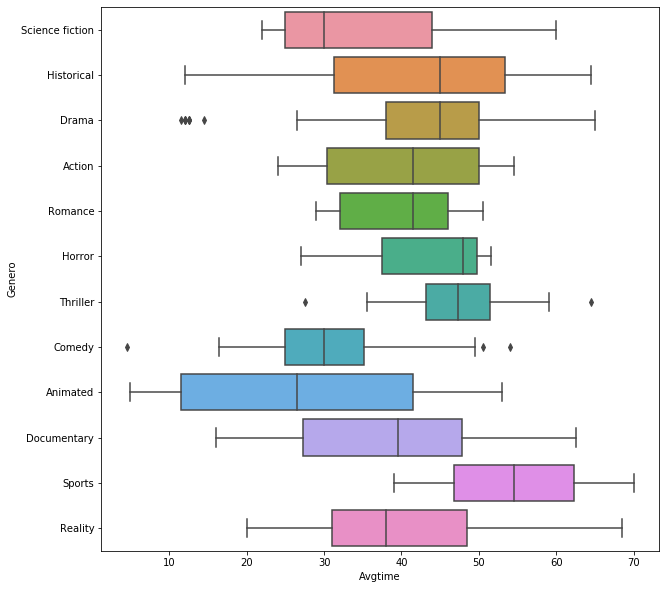

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Avgtime',y='Genero',data=Actuals)
plt.show()

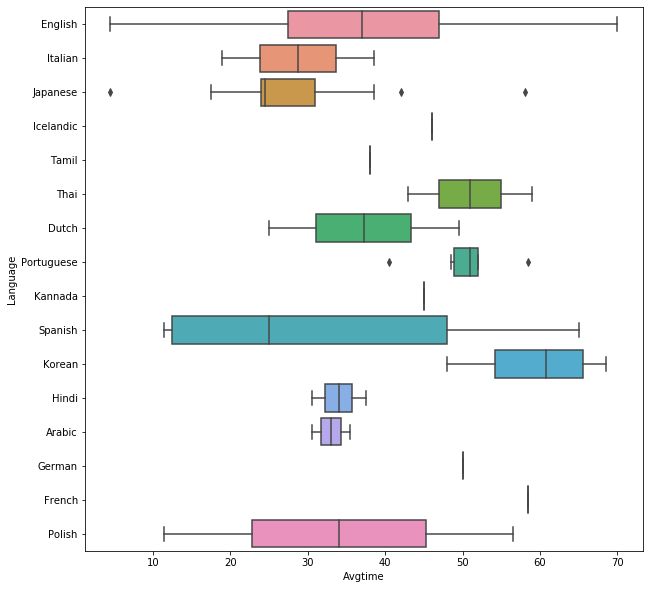

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Avgtime",y="Language",data=Actuals)
plt.show()

Podemos ver que la serie más larga dura en promedio 70 minutos por episodio, las series del género sports suelen ser más largas, mientras que las comedy son más cortas. Además, el idioma coreano tiene una mediana mayor que el resto de los idiomas en cuanto a duración media.

#### Series estrenadas por fecha

In [25]:
Actuals.dtypes

Title               object
Genre               object
Language            object
Premiere            object
Runtime             object
Seasons             object
mes                 object
dia                  int64
anio                 int64
Fecha       datetime64[ns]
Prim_mes    datetime64[ns]
min                float64
max                float64
Temps              float64
Eps                float64
Genero              object
Teps               float64
Avgtime            float64
dtype: object

In [26]:
fecha=datetime.strptime("2019-01-01","%Y-%m-%d")
generos=["Drama","Reality","Comedy"]
Actuals[(Actuals['Prim_mes']>=fecha) & (Actuals["Genero"].isin(generos))].sort_values("Prim_mes",ascending=True)

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes,min,max,Temps,Eps,Genero,Teps,Avgtime
30,Sex Education,Comedy-drama,English,"January 11, 2019",47–61 min,"3 seasons, 24 episodes",January,11,2019,2019-01-11,2019-01-01,47.0,61.0,3.0,24.0,Comedy,72.0,54.0
31,Russian Doll,Comedy,English,"February 1, 2019",25–30 min,"1 season, 8 episodes",February,1,2019,2019-02-01,2019-02-01,25.0,30.0,1.0,8.0,Comedy,8.0,27.5
226,Selling Sunset,Reality,English,"March 22, 2019",28–46 min,"4 seasons, 34 episodes",March,22,2019,2019-03-22,2019-03-01,28.0,46.0,4.0,34.0,Reality,136.0,37.0
32,I Think You Should Leave with Tim Robinson,Sketch comedy,English,"April 23, 2019",15–18 min,"2 seasons, 12 episodes",April,23,2019,2019-04-23,2019-04-01,15.0,18.0,2.0,12.0,Comedy,24.0,16.5
4,Black Summer,Apocalyptic fiction drama,English,"April 11, 2019",21–58 min,"2 seasons, 16 episodes",April,11,2019,2019-04-11,2019-04-01,21.0,58.0,2.0,16.0,Drama,32.0,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Midnight at the Pera Palace,Drama,English,"March 3, 2022",40–47 min,"1 season, 8 episodes",March,3,2022,2022-03-03,2022-03-01,40.0,47.0,1.0,8.0,Drama,8.0,43.5
284,Last One Standing,Crime comedy/Variety show,Japanese,"March 8, 2022",30–47 min,"1 season, 8 episodes",March,8,2022,2022-03-08,2022-03-01,30.0,47.0,1.0,8.0,Comedy,8.0,38.5
279,Making Fun,Reality show,English,"March 4, 2022",37–43 min,"1 season, 8 episodes",March,4,2022,2022-03-04,2022-03-01,37.0,43.0,1.0,8.0,Reality,8.0,40.0
280,Byron Baes,Reality show,English,"March 9, 2022",35–45 min,"1 season, 8 episodes",March,9,2022,2022-03-09,2022-03-01,35.0,45.0,1.0,8.0,Reality,8.0,40.0


In [27]:
GenActuals=Actuals[Actuals['Genero'].isin(generos)]
GenActuals=GenActuals.groupby(["Genero","Prim_mes"]).count()["Title"].reset_index()
GenActuals

,Genero,Prim_mes,Title
0,Comedy,2015-05-01,1
1,Comedy,2015-11-01,1
2,Comedy,2017-09-01,1
3,Comedy,2018-04-01,1
4,Comedy,2018-08-01,1
...,...,...,...
83,Reality,2021-11-01,6
84,Reality,2021-12-01,7
85,Reality,2022-01-01,2
86,Reality,2022-02-01,2


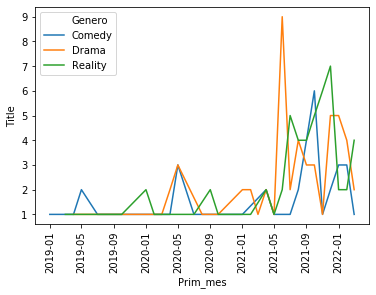

In [28]:
sns.lineplot(x="Prim_mes",y="Title",hue="Genero",data=GenActuals[GenActuals["Prim_mes"]>=fecha])
plt.xticks(rotation="vertical")
plt.show()

#### Análisis gráfico TBA

In [30]:
TBA.head()

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes,min,max,Temps,Eps,Genero
0,The Last Bus,Science fiction,English,"April 1, 2022",TBA,TBA,April,1,2022,2022-04-01,2022-04-01,NaN,NaN,NaN,NaN,Science fiction
1,Anatomy of a Scandal,Anthology series,English,"April 15, 2022",TBA,6 episodes,April,15,2022,2022-04-15,2022-04-01,NaN,NaN,NaN,NaN,Historical
2,Eternally Confused and Eager for Love,Comedy-drama,English,"March 18, 2022",TBA,TBA,March,18,2022,2022-03-18,2022-03-01,NaN,NaN,NaN,NaN,Comedy
3,Super PupZ,Children's comedy,English,"March 31, 2022",TBA,TBA,March,31,2022,2022-03-31,2022-03-01,NaN,NaN,NaN,NaN,Comedy
4,Human Resources,Comedy,English,"March 18, 2022",TBA,"1 season, 10 episodes",March,18,2022,2022-03-18,2022-03-01,NaN,NaN,1.0,10.0,Comedy


#### Gráfico de columnas por género

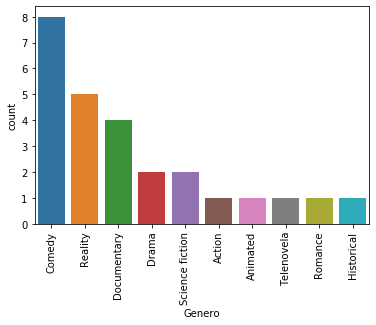

In [31]:
sns.countplot(x="Genero",data=TBA,order=TBA['Genero'].value_counts().index)
plt.xticks(rotation="vertical")
plt.show()

Podemos ver que de las series que van a estrenarse, el género más común es comedy.

#### Gráfico de columnas por idioma

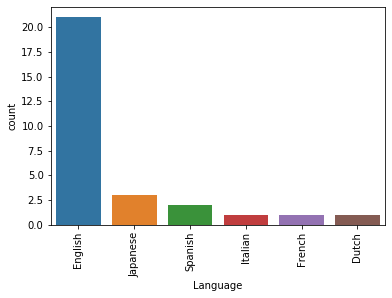

In [32]:
sns.countplot(x="Language",data=TBA,order=TBA["Language"].value_counts().index)
plt.xticks(rotation="vertical")
plt.show()

Además, la gran mayoría de las nuevas series son en inglés.

#### Temporadas y episodios programados para series nuevas

In [40]:
TBA[TBA["Temps"].notna()]

,Title,Genre,Language,Premiere,Runtime,Seasons,mes,dia,anio,Fecha,Prim_mes,min,max,Temps,Eps,Genero
4,Human Resources,Comedy,English,"March 18, 2022",TBA,"1 season, 10 episodes",March,18,2022,2022-03-18,2022-03-01,NaN,NaN,1.0,10.0,Comedy
7,Team Zenko Go,NaN,English,"March 15, 2022",TBA,"1 season, 12 episodes",March,15,2022,2022-03-15,2022-03-01,NaN,NaN,1.0,12.0,NaN
8,Transformers: Botbots,NaN,English,"March 25, 2022",TBA,"1 season, 10 episodes",March,25,2022,2022-03-25,2022-03-01,NaN,NaN,1.0,10.0,NaN
9,Trivia Quest,NaN,English,"April 1, 2022",TBA,"1 season, 30 episodes",April,1,2022,2022-04-01,2022-04-01,NaN,NaN,1.0,30.0,NaN
12,Cracow Monsters,Fantasy drama,English,"March 18, 2022",TBA,"1 season, 8 episodes",March,18,2022,2022-03-18,2022-03-01,NaN,NaN,1.0,8.0,Drama
21,Life After Death with Tyler Henry,Reality,English,"March 11, 2022",TBA,"1 season, 9 episodes",March,11,2022,2022-03-11,2022-03-01,NaN,NaN,1.0,9.0,Reality
27,Tiger & Bunny (season 2),Anime,Japanese,"April 8, 2022",TBA,"1 season, 25 episodes",April,8,2022,2022-04-08,2022-04-01,NaN,NaN,1.0,25.0,Animated


Podemos observar que, de las series que sí tienen información sobre temporadas y episodios, la mayoría ronda los 10 eps. en una temporada, excepto dos.
La serie "Tiger & Bunny (season 2)" que será 1 temporada y 25 episodios y la serie "Trivia Quest" que contará con 1 temporada con 30 episodios.

#### Series futuras por fecha

In [43]:
TBA.groupby("Prim_mes").count()["Title"]

Prim_mes
2022-03-01    22
2022-04-01     7
Name: Title, dtype: int64

In [44]:
TBA.groupby(["Prim_mes","Genero"]).count()["Title"]

Prim_mes    Genero         
2022-03-01  Action             1
            Comedy             8
            Documentary        4
            Drama              2
            Reality            4
            Romance            1
2022-04-01  Animated           1
            Historical         1
            Reality            1
            Science fiction    2
            Telenovela         1
Name: Title, dtype: int64

Vemos que a la fecha que se obtuvo este dataset, había 22 a estrenar en marzo, de las cuales 8 son de comedy, mientras que para abril había 7 con 2 de Science fiction.